# Построение рельефа растрового изображения.

Формат JPG можно представить в виде трёхмерной матрицы, где:
* x-рядки - координаты пикселей по оси абсцисс
* y-колонки - координаты пикселей по оси ординат
* z-глубина - вложенные характеристики x,y точки в виде последовательности масок красного, зеленого и синего цветов. 

In [23]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [25]:
def get_image_colours(image):
    '''taking image and return 2D array 
    with 1 column and rows filled by RGB masks inside'''
    image = np.array(image)
    image = image.reshape((image.shape[0] * image.shape[1],3))
    return image

def get_image_grid(image):
    '''taking image and return 3D array
    with x-pixels rows, y-pixels columns
    both filled by RGB masks values inside each cells'''
    np_image = np.array(image)
    return np_image

In [26]:
pil_img = Image.open("8xp40tn4cb221.jpg")
get_image_colours(pil_img)

array([[ 4,  4,  2],
       [ 5,  5,  3],
       [ 5,  5,  3],
       ...,
       [19, 18, 14],
       [19, 18, 14],
       [18, 17, 13]], dtype=uint8)

In [70]:
greyscale = Image.open("Normal_posteroanterior_(PA)_chest_radiograph_(X-ray).jpg")
get_image_colours(greyscale)


array([[10, 10, 10],
       [11, 11, 11],
       [11, 11, 11],
       ...,
       [94, 94, 94],
       [92, 92, 92],
       [92, 92, 92]], dtype=uint8)

In [71]:
grey_grid = get_image_grid(greyscale)


In [73]:
grey_grid.shape
np.save('Grey_grid_3D', grey_grid)

In [74]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(0, 15, 15)
y = np.linspace(0, 16, 15)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)  

In [77]:
grey_grid1 = grey_grid.sum(axis=2)
grey_grid1.shape
grey_grid1

array([[ 30,  33,  33, ..., 102, 102, 111],
       [ 54,  57,  60, ..., 171, 174, 168],
       [  3,   6,   6, ...,  96,  99,  87],
       ...,
       [108, 108, 111, ..., 279, 264, 273],
       [111, 114, 114, ..., 276, 264, 276],
       [102, 111, 114, ..., 282, 276, 276]], dtype=uint32)

In [78]:
grey_grid1.shape

(2207, 1929)

In [79]:
np.save('grey_grid1', grey_grid1)

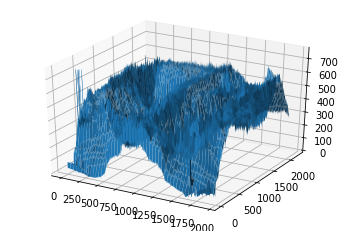

In [83]:
x_1d = np.arange(np.size(grey_grid1, 1))
y_1d = np.arange(np.size(grey_grid1 , 0))
x,y = np.meshgrid(x_1d,y_1d)
z = np.array(grey_grid1)

plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot_surface(x,y,z)

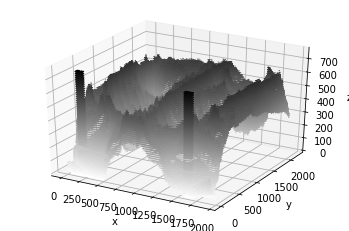

In [84]:
x_1d = np.arange(np.size(grey_grid1, 1))
y_1d = np.arange(np.size(grey_grid1 , 0))
x,y = np.meshgrid(x_1d,y_1d)
z = np.array(grey_grid1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

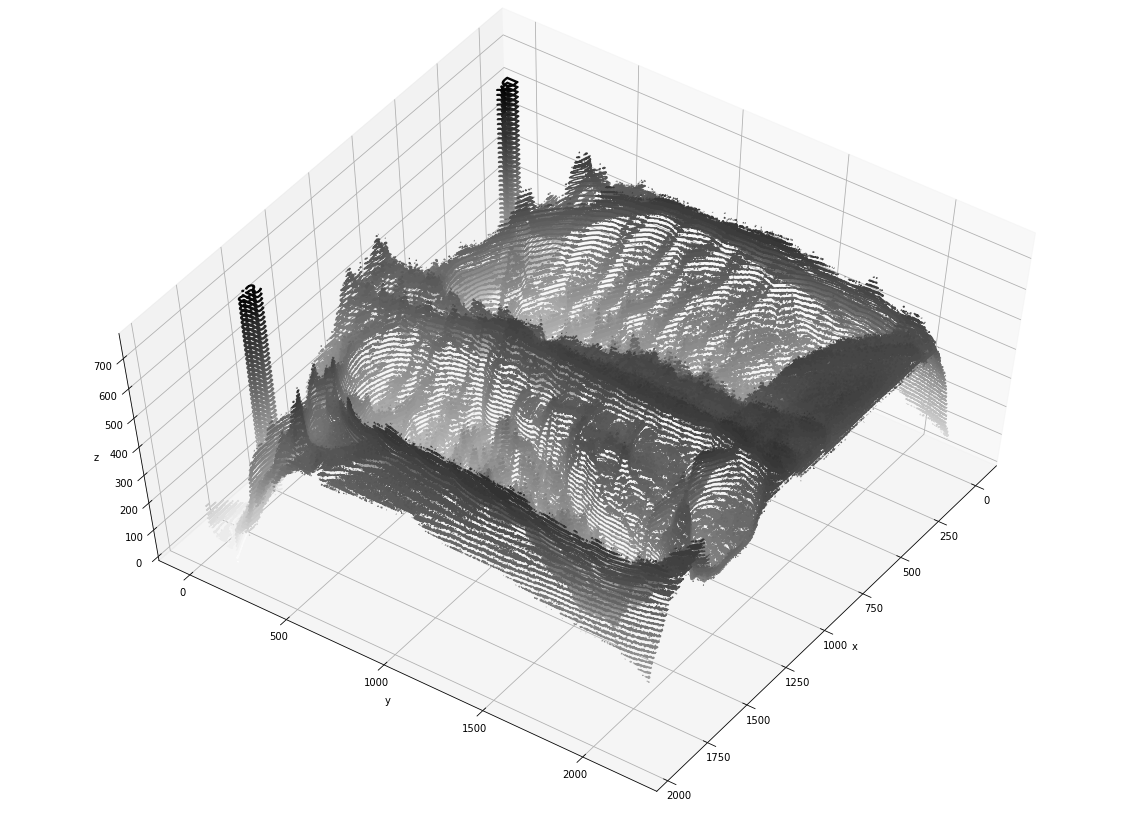

In [88]:
ax.view_init(60, 35)
fig.set_size_inches(20, 15, forward=True)
fig.savefig('test2png.png', dpi=300)
fig

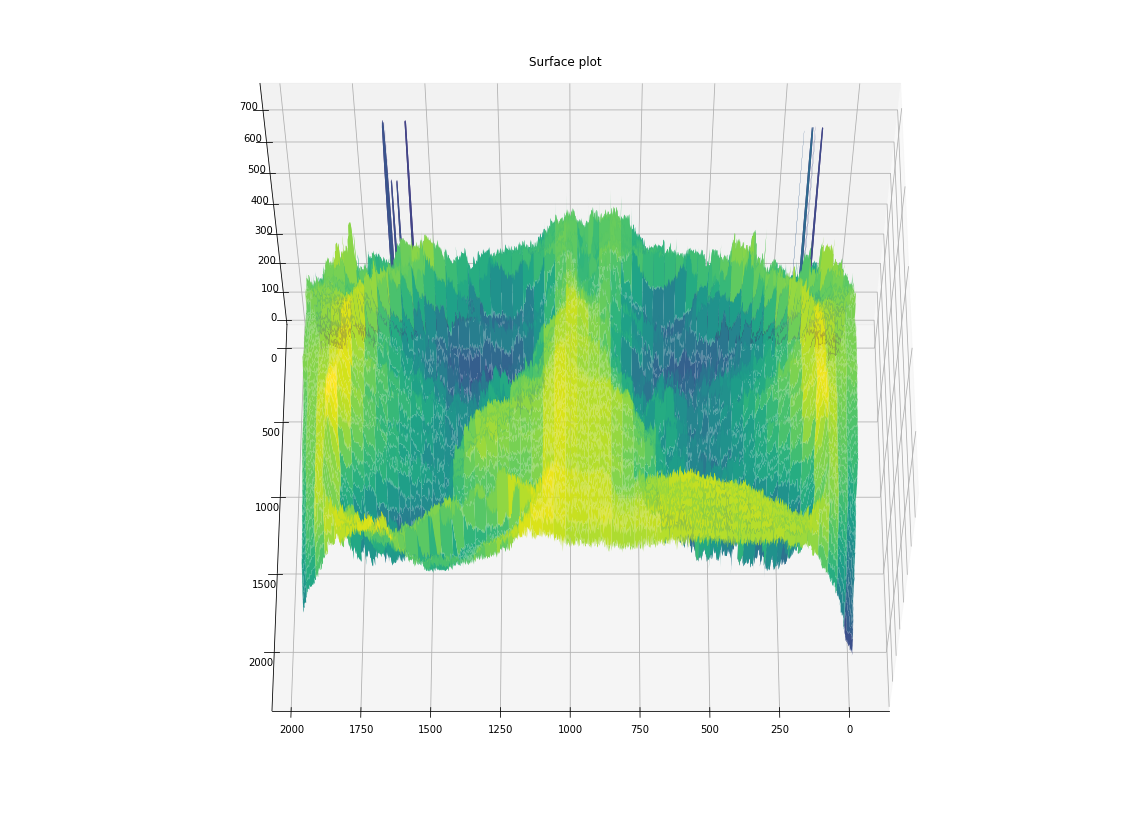

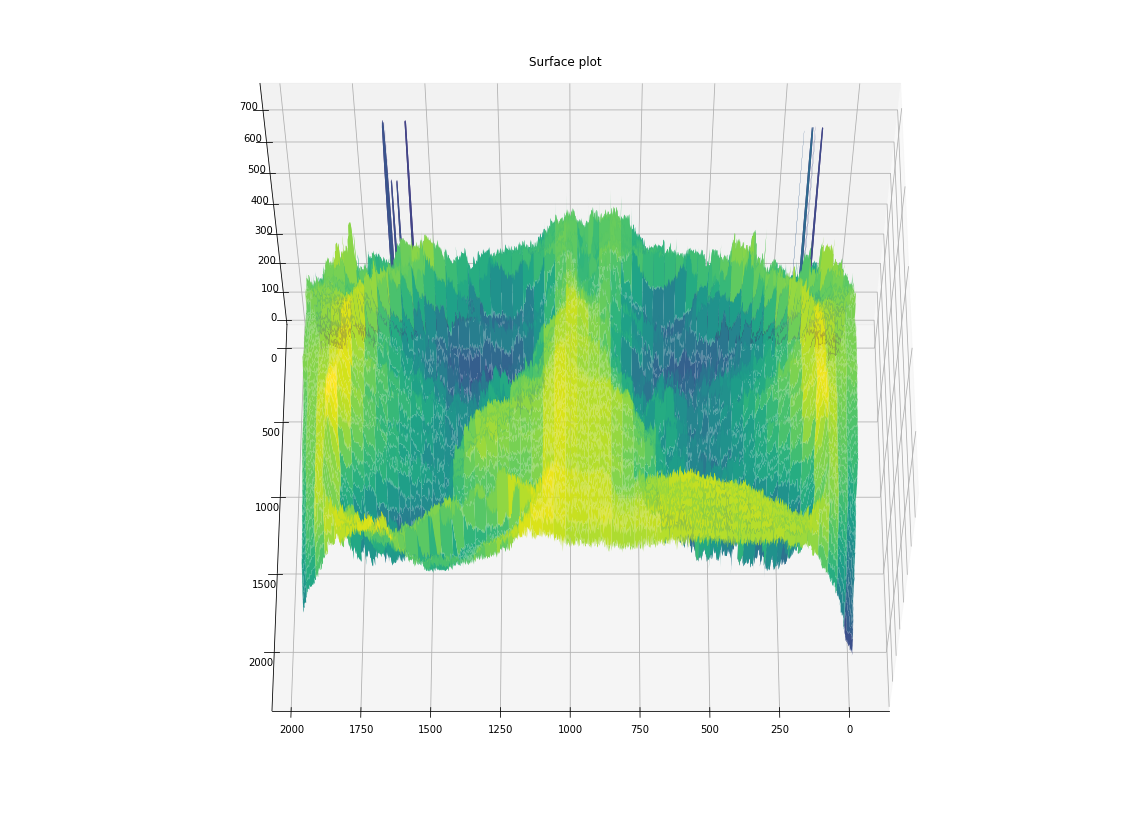

In [94]:
x_1d = np.arange(np.size(grey_grid1, 1))
y_1d = np.arange(np.size(grey_grid1 , 0))
x,y = np.meshgrid(x_1d,y_1d)
z = np.array(grey_grid1)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
ax.view_init(60, 90)
fig.set_size_inches(20, 15, forward=True)
fig